# Tugas Besar - IF2220 - Probabilitas dan Statistika
# Penarikan Kesimpulan dan Pengujian Hipotesis

## Enam Langkah Testing
1. Tentukan Hipotesis nol $(H_0 : θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$, atau $θ ≠ θ_0$.
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung $p$-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Table of Contents
1. Soal<br>
    1.1 [Menulis Deskripsi Statistika](#1.1-Menulis-Deskripsi-Statistika)<br>
    1.2 [Membuat Visualisasi Plot Distribusi](#1.2-Membuat-Visualisasi-Plot-Distribusi)<br>
    1.3 [Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak](#1.3-Menentukan-Setiap-Kolom-Numerik-Berdistribusi-Normal-atau-Tidak)<br>
    1.4 [Melakukan Test Hipotesis 1 Sampel](#1.4-Melakukan-Test-Hipotesis-1-Sampel)<br>
    1.5 [Melakukan Test Hipotesis 2 Sampel](#1.5-Melakukan-Test-Hipotesis-2-Sampel)<br>
2. Jawaban<br>
    2.1 [Menulis Deskripsi Statistika](#2.1-Menulis-Deskripsi-Statistika)<br>
    2.2 [Membuat Visualisasi Plot Distribusi](#2.2-Membuat-Visualisasi-Plot-Distribusi)<br>
    2.3 [Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak](#2.3-Menentukan-Setiap-Kolom-Numerik-Berdistribusi-Normal-atau-Tidak)<br>
    2.4 [Melakukan Test Hipotesis 1 Sampel dengan 6 Langkah Testing](#2.4-Melakukan-Test-Hipotesis-1-Sampel-dengan-6-Langkah-Testing)<br>
    2.4.1 [Nilai rata-rata pH di atas 3.29?](#2.4.1-Nilai-rata-rata-pH-di-atas-3.29?)<br>
    2.4.2 [Nilai rata-rata Residual Sugar tidak sama dengan 2.50?](#2.4.2-Nilai-rata-rata-Residual-Sugar-tidak-sama-dengan-2.50?)<br>
    2.4.3 [Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?](#2.4.3-Nilai-rata-rata-150-baris-pertama-kolom-sulphates-bukan-0.65?)<br>
    2.4.4 [Nilai rata-rata total sulfur dioxide di bawah 35?](#2.4.4-Nilai-rata-rata-total-sulfur-dioxide-di-bawah-35?)<br>
    2.4.5 [Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?](#2.4.5-Proporsi-nilai-total-sulfur-dioxide-yang-lebih-dari-40,-adalah-tidak-sama-dengan-50%-?)<br>
    2.5 [Melakukan Test Hipotesis 2 Sampel dengan 6 Langkah Testing](#2.5-Melakukan-Test-Hipotesis-2-Sampel-dengan-6-Langkah-Testing)<br>
3. Referensi

## Soal

Diberikan sebuah data anggur.csv yang dapat diakses pada utas berikut: [Dataset Tugas Besar IF2220](https://github.com/Raylouiss/K01-T1-IF2220-13521127-13521143/blob/main/anggur.csv). 

anggur.csv merupakan data metrik kualitas wine (minuman anggur) yang mengandung 12 kolom sebagai berikut:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
Kolom 1-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target

Anda diminta untuk melakukan analisis statistika sebagai berikut : 

## 1.1 Menulis Deskripsi Statistika

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

## 1.2 Membuat Visualisasi Plot Distribusi

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

## 1.3 Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

## 1.4 Melakukan Test Hipotesis 1 Sampel

Melakukan test hipotesis 1 sampel,
1. Nilai rata-rata pH di atas 3.29?
2. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
3. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
4. Nilai rata-rata total sulfur dioxide di bawah 35?
5. Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

## 1.5 Melakukan Test Hipotesis 2 Sampel
1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?


## Jawaban

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, t, ttest_ind, ttest_1samp,f, norm
import seaborn as sns
import math

anggur = pd.read_csv("anggur.csv")

## 2.1 Menulis Deskripsi Statistika

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
desc = anggur.describe(include = [np.number])
desc= desc.rename(index={"50%": "median"})
desc.loc['modus'] = anggur.mode(numeric_only=True).iloc[0]
desc.loc["variansi"] = anggur.var()
desc.loc['range'] = desc.loc['max'] - desc.loc['min']
desc.loc['IQR'] = desc.loc['75%'] - desc.loc['25%']
desc.loc['skewness'] = anggur.skew()
desc.loc['kurtosis'] = anggur.kurtosis()
desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520838,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
median,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
modus,6.540000,0.554600,0.301900,0.032555,0.015122,0.194679,35.200000,0.995900,3.340000,0.590000,9.860000,8.000000
variansi,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051


## 2.2 Membuat Visualisasi Plot Distribusi

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

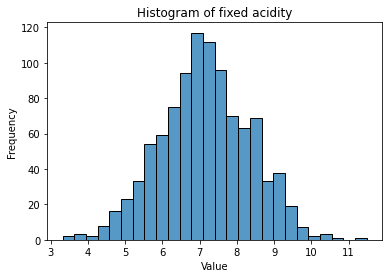

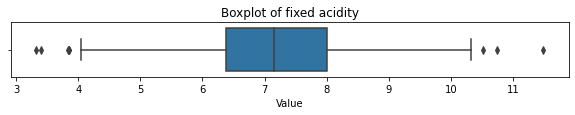

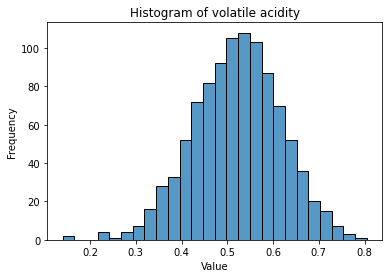

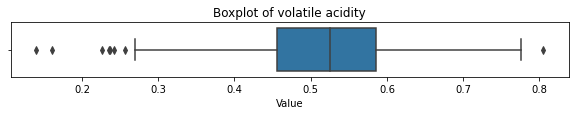

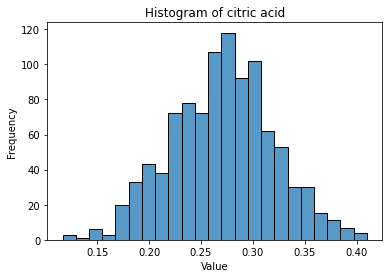

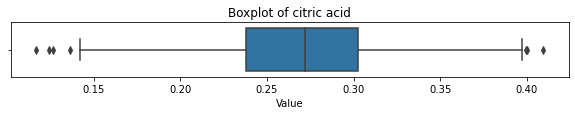

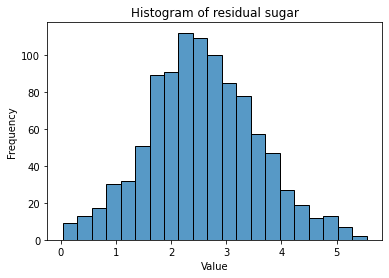

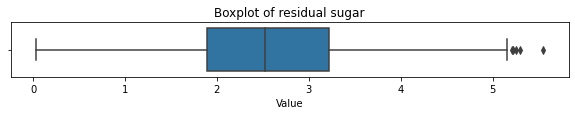

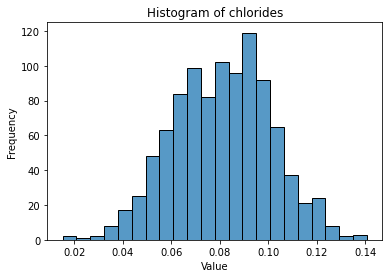

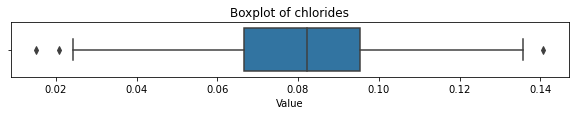

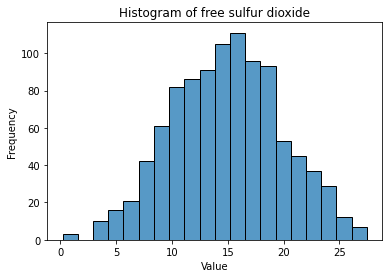

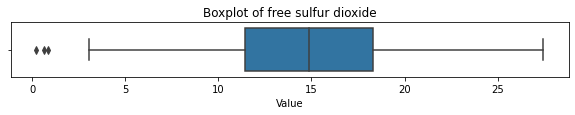

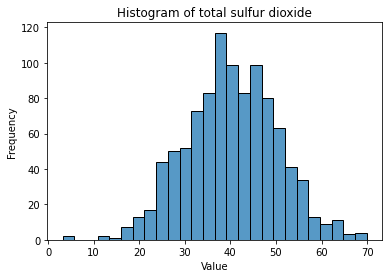

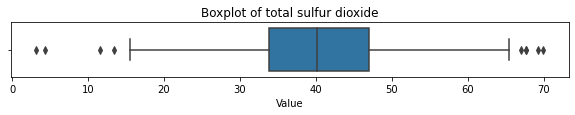

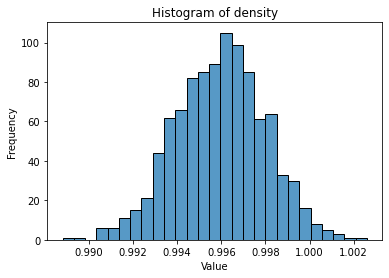

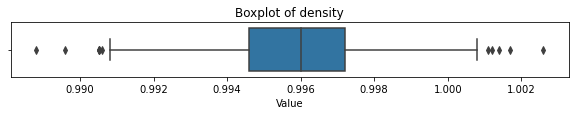

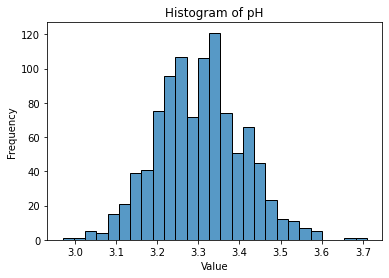

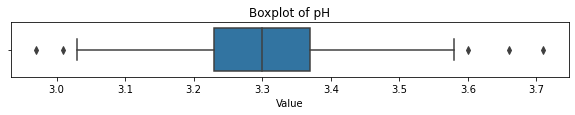

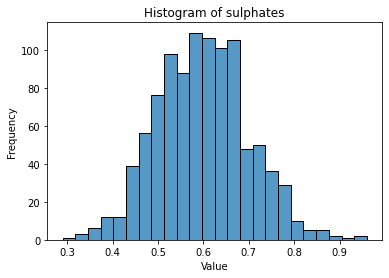

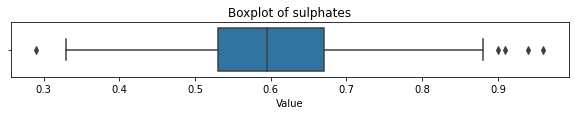

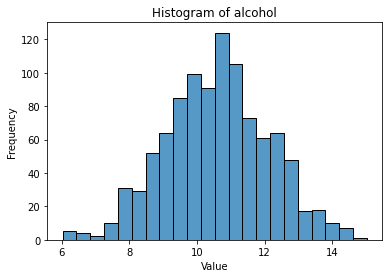

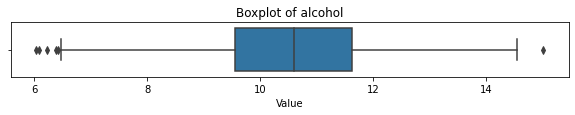

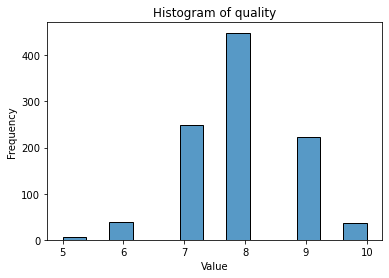

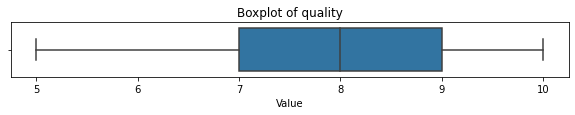

In [3]:
#Loop untuk setiap kolom yang datanya numerik
for col in anggur.select_dtypes(include=[np.number]):
    
    #Histogram
    sns.histplot(anggur[col], bins="auto")
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()



    #Boxplot
    plt.figure(figsize = (10,1))
    sns.boxplot(data = anggur, x = anggur[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Value')
    plt.show()

## Penjelasan Histogram dan Boxplot

## 2.3 Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

fixed acidity is normally distributed


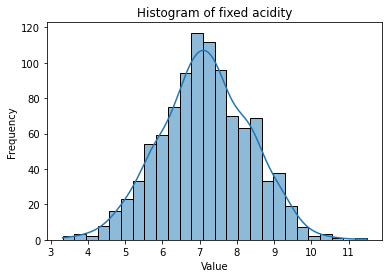

volatile acidity is normally distributed


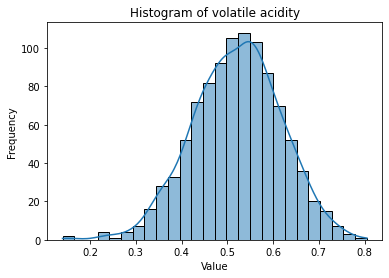

citric acid is normally distributed


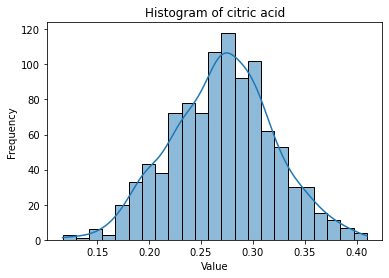

residual sugar is normally distributed


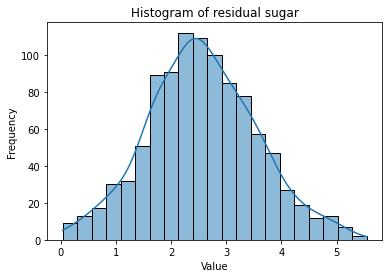

chlorides is normally distributed


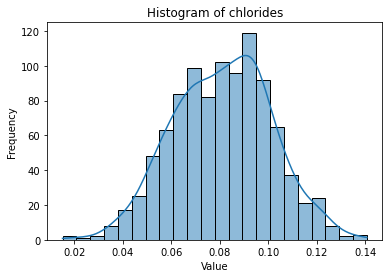

free sulfur dioxide is not normally distributed


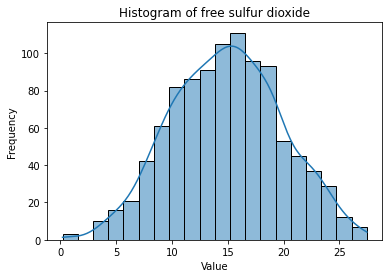

total sulfur dioxide is not normally distributed


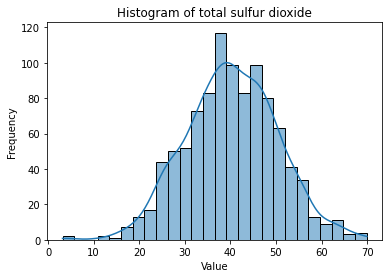

density is normally distributed


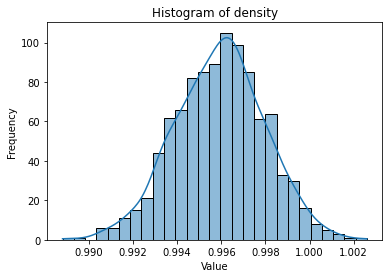

pH is normally distributed


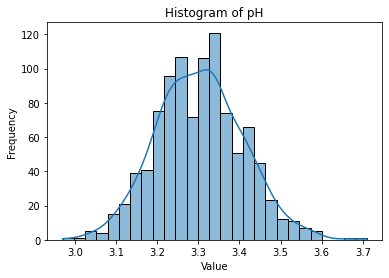

sulphates is normally distributed


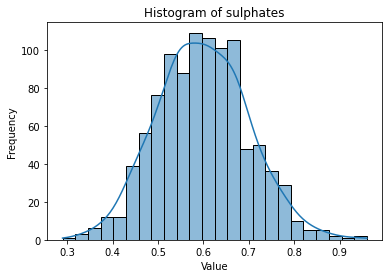

alcohol is normally distributed


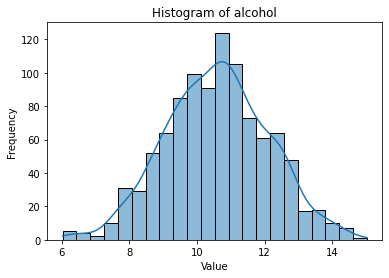

quality is normally distributed


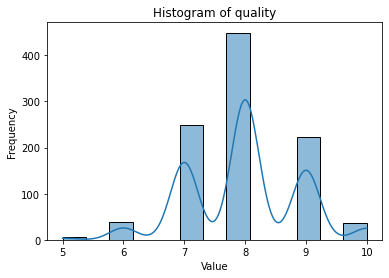

In [4]:
from scipy.stats import chisquare

for col in anggur.select_dtypes(include=[np.number]):
    stat, p = chisquare(anggur[col])
    alpha = 0.05
    
    if p > alpha:
        print(f'{col} is normally distributed')
    else:
        print(f'{col} is not normally distributed')
    
    sns.histplot(anggur[col], bins="auto", kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## 2.4 Melakukan Test Hipotesis 1 Sampel dengan 6 Langkah Testing

Melakukan test hipotesis 1 sampel,<br>
a. Nilai rata-rata pH di atas 3.29?<br>
b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?<br>
c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?<br>
d. Nilai rata-rata total sulfur dioxide di bawah 35?<br>
e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?<br>

### 2.4.1 Nilai rata-rata pH di atas 3.29?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{pH} = 3.29$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{pH} > 3.29$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **one-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{0.05} = t_{0.95} = 1.646$<br>

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [5]:
anggurPH = anggur['pH']
mean = anggurPH.mean()
n = len(anggurPH)
std = anggurPH.std()
x = 3.29

# Langkah 1
# H0 : mean = 3.29

# Langkah 2
# H1 : mean > 3.29

# Langkah 3
alpha = 0.05

# Langkah 4
dof = n-1 
tCrit = t.ppf(1-alpha, dof)

# langkah 5
tValue = ((mean - x) / (std / math.sqrt(n)))

print(tCrit)
print(tValue)
# Langkah 6
if (tValue > tCrit):
    print("Tolak H0, mean > 3.29")
else:
    print("Tidak menolak H0, mean = 3.29")

1.646380345427535
4.103780793366056
Tolak H0, mean > 3.29


### 2.4.2 Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{residualSugar} = 2.5$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{residualSugar} \neq 2.5$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.95} = 1.646$<br> atau $t < t_{0.05} = -1.646$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [6]:
anggurResidualSugar = anggur['residual sugar']
mean = anggurResidualSugar.mean()
n = len(anggurResidualSugar)
std = anggurResidualSugar.std()
x = 2.5

# Langkah 1
# H0 : mean = 2.5

# Langkah 2
# H1 : mean != 2.5

# Langkah 3
alpha = 0.05

# Langkah 4
dof = n-1
tCrit1 = t.ppf(alpha/2, dof)
tCrit2 = t.ppf(1-alpha/2, dof)

# langkah 5
tValue = ((mean - x) / (std / math.sqrt(n)))

print(tCrit1)
print(tCrit2)
print(tValue)
# Langkah 6
if (tValue > tCrit2 or tValue < tCrit1):
    print("Tolak H0, mean != 2.5")
else:
    print("Tidak menolak H0, mean = 2.5")

-1.962341461133449
1.9623414611334487
2.147961943553881
Tolak H0, mean != 2.5


### 2.4.3 Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{sulphates} = 0.65$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{sulphates} \neq 0.65$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.95} = 1.646$<br> atau $t < t_{0.05} = -1.646$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [7]:
anggurSulphates = anggur['sulphates'].head(150)
mean = anggurSulphates.mean()
n = len(anggurSulphates)
std = anggurSulphates.std()
x = 0.65

# Langkah 1
# H0 : mean = 0.65

# langkah 2
# H1 : mean != 0.65

# Langkah 3
alpha = 0.05

# Langkah 4
dof = n-1
tCrit1 = t.ppf(alpha/2, dof)
tCrit2 = t.ppf(1-alpha/2, dof)

# langkah 5
tValue = ((mean - x) / (std / math.sqrt(n)))

print(tCrit1)
print(tCrit2)
print(tValue)
print(mean)
print(std)
# Langkah 6
if (tValue > tCrit2 or tValue < tCrit1):
    print("Tolak H0, mean != 0.65")
else:
    print("Tidak menolak H0, mean = 0.65")

-1.9760131776791554
1.976013177679155
-4.964843393315906
0.6058666666666668
0.10886964477104122
Tolak H0, mean != 0.65


### 2.4.4 Nilai rata-rata total sulfur dioxide di bawah 35?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{sulfurDioxide} = 35$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{sulfurDioxide} < 35$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t < t_{0.05} = -1.646$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*
    

In [8]:
anggurSulfurDioxide = anggur['total sulfur dioxide']
mean = anggurSulfurDioxide.mean()
n = len(anggurSulfurDioxide)
std = anggurSulfurDioxide.std()
x = 35

#Langkah 1
#H0 : mean = 35

#Langkah 2
#H1 : mean < 35

#Langkah3
alpha = 0.05

#Langkah 4
df = n - 1
tCrit = t.ppf(alpha, df)

#Langkah 5
tValue = ((mean - x)/(std / math.sqrt(n)))
pValue = t.cdf(abs(tValue),df)
# tValue, pValue = ttest_1samp(anggurSulfurDioxide, x, alternative='less')

#Langkah 6
if tValue < tCrit and pValue < alpha :
    print ("Tolak H0, mean < 35")
else :
    print ("Tidak Tolak H0, mean = 35")
print(tValue)
# print(tCrit)
print(pValue)

Tidak Tolak H0, mean = 35
16.786387372296968
1.0


### 2.4.5 Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?


1. **Hipotesis Nol**<br>
$H_0 : P(X > 40) = 0.5$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : P(X > 40) \neq 0.5$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Karena sampel yang diambil terlalu besar, maka akan digunakan binomial didekati normal<br>
    Sehingga berdasarkan tabel distribusi normal atau fungsi distribusi normal yang tersedia di python di dapatkan nilai kritis<br> 
    $z < -z_{\alpha / 2} = -1.96$ atau $z > z_{\alpha / 2} = 1.96$<br>
 
5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $z = \Large\frac{x - np_0}{\sqrt{np_0q_0}}$ = $\Large\frac{\hat{p} - p_0}{\sqrt{p_0q_0 / n}}$<br>
    
    Dengan $\hat{p}$ adalah proporsi sampel,<br>
    $x$ adalah banyak sampel yang memenuhi syarat,<br>
    $p_0$ adalah proporsi hipotesis,<br>
    $q_0$ adalah $1-p_0$, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [9]:
n = len(anggur['total sulfur dioxide'])
p = np.sum(anggur['total sulfur dioxide'] > 40)/n
P0 = 0.5

#Langkah 1
#H0 : P(X > 40) = 0.5

#Langkah 2
#H1 : P(X > 40) != 0.5

#Langkah3
alpha = 0.05

#Langkah 4
zCrit1 = -1.96
zCrit2 = 1.96

#Langkah 5
zValue = (p - P0) / math.sqrt(P0 * (1 - P0) / n)

#Langkah 6
if zValue < zCrit1 or zValue > zCrit2 :
    print ("Tolak H0, P(X > 40) != 0.5")
else :
    print ("Tidak tolak H0, P(X > 40) = 0.5")
print(zValue)

Tidak tolak H0, P(X > 40) = 0.5
0.7589466384404118


## 2.5 Melakukan Test Hipotesis 2 Sampel dengan 6 Langkah Testing


 Melakukan test hipotesis 2 sampel,<br>
1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama? <br>
2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001? <br>
3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates? <br>
4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?<br>
5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?<br>

In [10]:
def isVarianEqual(sample1, sample2, alpha) :
    # Langkah 1
    # H0 : variansi1 = variansi2

    # Langkah 2
    # H1 : variansi1 != variansi2

    # Langkah 3
    # alpha = 0.05

    # Langkah 4
    F = sample1.var() / sample2.var()
    dfn = len(sample1) - 1 # degrees of freedom numerator
    dfd = len(sample2) - 1 # degrees of freedom denominator

    # Langkah 5
    fCrit2 = f.ppf(1-alpha/2, dfn, dfd)
    fCrit1 = 1/fCrit2
    
    # Langkah 6
    if (F < fCrit1 or F > fCrit2): # Reject H0
        return False
    else :                         # Failed to reject H0
        return True

In [11]:
# nomor 5a

n = len(anggur['fixed acidity'])
anggurFixedAcidity1 = anggur['fixed acidity'][:n//2]
anggurFixedAcidity2 = anggur['fixed acidity'][n//2:]
mean1 = anggurFixedAcidity1.mean()
mean2 = anggurFixedAcidity2.mean()
n1 = len(anggurFixedAcidity1)
n2 = len(anggurFixedAcidity2)
std1 = anggurFixedAcidity1.std()
std2 = anggurFixedAcidity2.std()
alpha = 0.05

# test if varian equal or no
varianEqual = isVarianEqual(anggurFixedAcidity1,anggurFixedAcidity2,alpha)
print ("varian equal = ", varianEqual)
#t-test

#Langkah 1
#H0 : mean1 = mean2

#Langkah 2
#H1 : mean1 != mean2

#Langkah3
alpha = 0.05

#Langkah 4
df = n1 + n2 - 2
tCrit1 = t.ppf(alpha/2, df)
tCrit2 = t.ppf(1 - alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2
# a, b = ttest_ind(anggurFixedAcidity1,anggurFixedAcidity2, equal_var = True )

#Langkah 6
if (tValue > tCrit2 or tValue < tCrit1) and p_value/2 < alpha:
    print ("Tolak H0, mean1 dan mean2 berbeda")
else :
    print ("Tidak Tolak H0, mean1 dan mean2 sama")
print(tValue)
# print(a)
# print(tCrit1)
# print(tCrit2)
print(p_value)
# print(b)

varian equal =  True
Tidak Tolak H0, mean1 dan mean2 sama
0.026041069999052112
0.9792297863877091


In [12]:
# nomor 5b

#f-test dulu (blm)

#asumsi equal = true
n = len(anggur['chlorides'])
anggurChrolides1 = anggur['chlorides'][:n//2]
anggurChrolides2 = anggur['chlorides'][n//2:]
mean1 = anggurChrolides1.mean()
mean2 = anggurChrolides2.mean()
n1 = len(anggurChrolides1)
n2 = len(anggurChrolides2)
std1 = anggurChrolides1.std()
std2 = anggurChrolides2.std()
d0 = 0.001
alpha = 0.05

# test if varian equal or no
varianEqual = isVarianEqual(anggurChrolides1, anggurChrolides2,alpha)
print ("varian equal = ", varianEqual)

#t-test

#Langkah 1
#H0 : mean1 - mean2 = 0.001

#Langkah 2
#H1 : mean1 - mean2 != 0.001

#Langkah3
alpha = 0.05

#Langkah 4
df = n1 + n2 - 2
tCrit1 = t.ppf(alpha/2, df)
tCrit2 = t.ppf(1-alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2-d0)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2

#Langkah 6
if (tValue > tCrit2 or tValue < tCrit1) and p_value/2 < alpha :
    print ("Tolak H0, mean1 - mean2 != 0.001")
else :
    print ("Tidak Tolak H0, mean1 - mean2 = 0.001")
print(tValue)
# print(tCrit1)
# print(tCrit2)
print(p_value)

varian equal =  True
Tidak Tolak H0, mean1 - mean2 = 0.001
-0.46731712285223
0.6403750213156081


In [13]:
# nomor 5c

#f-test dulu (blm)

#asumsi equal = false (blm ganti rumus tapi hasil sama aja)
anggurVolatileAcidity = anggur['volatile acidity'][:25]
anggurSulphates = anggur['sulphates'][:25]
mean1 = anggurVolatileAcidity.mean()
mean2 = anggurSulphates.mean()
n1 = len(anggurVolatileAcidity)
n2 = len(anggurSulphates)
std1 = anggurVolatileAcidity.std()
std2 = anggurSulphates.std()
alpha = 0.05

# test if varian equal or no
varianEqual = isVarianEqual(anggurVolatileAcidity, anggurSulphates,alpha)
print ("varian equal = ", varianEqual)

#t-test

#Langkah 1
#H0 : mean1 = mean2

#Langkah 2
#H1 : mean1 != mean2

#Langkah3
alpha = 0.05

#Langkah 4
df2 = n1 + n2 -2
# df = ((std1**2/n1 + std2**2/n2)**2)/(((std1**2/n1)**2)/(n1-1) + ((std2**2/n2)**2)/(n2-1))
tCrit1 = t.ppf(alpha/2, df)
tCrit2 = t.ppf(1-alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
# tValue2 = (mean1 - mean2) / math.sqrt(std1*std1/n1 + std2*std2/n2)
p_value = (1-t.cdf(abs(tValue),df))*2
# a, b = ttest_ind(anggurVolatileAcidity,anggurSulphates, equal_var = True )

#Langkah 6
if ( tValue > tCrit2 or tValue < tCrit1) and p_value/2 < alpha:
    print ("Tolak H0, mean1 dan mean2 berbeda")
else :
    print ("Tidak Tolak H0, mean1 dan mean2 sama")
print(tValue)
# print(tValue2)
# print(a)
# print(tCrit1)
# print(tCrit2)
print(p_value)
# print(b)

varian equal =  True
Tolak H0, mean1 dan mean2 berbeda
-2.6374821676748703
0.008482282577024991


### Nomor 5d

In [14]:
n = len(anggur['residual sugar'])
residualSugar1 = anggur['residual sugar'][:n//2]
residualSugar2 = anggur['residual sugar'][n//2:]

if (isVarianEqual(residualSugar1, residualSugar2, 0.05)):
    print("Gagal menolak H0")
else:
    print("H0 ditolak")

Gagal menolak H0


### Nomor 5e

In [15]:
n = len(anggur['alcohol'])
alcohol1 = anggur['alcohol'][:n//2]
alcohol2 = anggur['alcohol'][n//2:]

# Langkah 1 
# H0 : p1 = p2
# Dengan p1 adalah proporsi setengah bagian awal alcohol dan p2 adalah proporsi setengah bagian akhir alcohol

# Langkah 2
# H1 : p1 > p2

# Langkah 3
alpha = 0.05
p1 = np.count_nonzero(alcohol1 > 7) / len(alcohol1)
p2 = np.count_nonzero(alcohol2 > 7) / len(alcohol2)
p = np.count_nonzero(anggur['alcohol'] > 7) / len(anggur['alcohol'])
q = 1 - p

# Langkah 5
zCrit = norm.ppf(1-alpha)
zValue = (p1 - p2) / math.sqrt(p * q * (1 / len(alcohol1) + 1 / len(alcohol2)))
pValue = (1 - norm.cdf(zValue))

print(zCrit)
print(pValue)
print(zValue)
# Langkah 6
if (zValue > zCrit and pValue < alpha):
    print("H0 ditolak")
else:
    print("Gagal menolak H0")

1.6448536269514722
0.5
0.0
Gagal menolak H0
